In [1]:
from pathlib import Path
import numpy as np
import pandas as pd

C = [125.0, 181.0, 39.0]

def get_omega(filepath):
    with open(filepath, 'r') as f:
        arrs = [eval(x) for x in f.read().split("+")]
    assert len(C) == len(arrs)
    q = [np.array(a) for a in arrs]
    m = [np.ceil(q[i] / C[i]).astype(int) for i in range(len(C))]
    return [q,m]

data = []
pathlist = Path("/home/pc/main/rust/network-pso/soln/intermediate").glob('*')
for path in pathlist:
    data.append(get_omega(path))
        
print(data[0][1])

[array([[[5]]]), array([[[2],
        [2],
        [1]]]), array([[[0],
        [0],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [0],
        [0],
        [1],
        [0],
        [1],
        [1],
        [4],
        [0],
        [0],
        [0]],

       [[0],
        [1],
        [0],
        [1],
        [0],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [0],
        [1],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [1],
        [2],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [2],
        [0],
        [1],
        [0]],

       [[1],
        [0],
 

In [2]:
dist = []
dist.append(pd.read_excel(
    "/home/pc/main/rust/network-cro/resources/Data_Distance_^0_Demand_17-09-2023.xlsx",
    'Distance Matrix',
    skiprows = 2,
    nrows = 2,
    usecols = 'C:C'
))

dist.append(pd.read_excel(
    "/home/pc/main/rust/network-cro/resources/Data_Distance_^0_Demand_17-09-2023.xlsx",
    'Distance Matrix',
    skiprows = 8,
    nrows = 2,
    usecols = 'C:E'
))

dist.append(pd.read_excel(
    "/home/pc/main/rust/network-cro/resources/Data_Distance_^0_Demand_17-09-2023.xlsx",
    'Distance Matrix',
    skiprows = 13,
    nrows = 4,
    usecols = 'B:AJ'
))

print(dist[2])

   Ahmednagar  Akola  Amravati  Aurangabad   Beed  Bhandara  Buldhana  \
0       272.9  607.5     679.8       359.9  400.0     896.0     484.2   
1       116.1  477.1     549.4       229.6  243.0     765.6     393.0   
2       591.5  253.1     156.8       478.3  520.3      69.7     351.8   

   Chandrapur  Dhule  Gadchiroli  ...  Raigad  Ratnagiri  Sangli  Satara  \
0       853.1  323.3       934.7  ...    73.1      332.5   383.0   262.5   
1       722.6  327.7       804.2  ...   144.2      322.0   242.6   122.1   
2       146.0  523.3       181.2  ...   819.7      956.1   810.5   825.3   

   Sindhudurg  Solapur  Thane  Wardha  Washim  Yavatmal  
0       507.2    407.8   29.7   765.8   574.2     697.1  
1       366.8    254.6  158.2   635.9   443.9     566.7  
2      1001.0    598.0  813.4    70.3   288.0     144.8  

[3 rows x 35 columns]


In [3]:
L = [2,3,1]
UL = [1.5,2.5,0.5]
s = [50,800,60]

def tdt(dist,loadt,unloadt,speed,idx):
    res = 0
    for i in range(3):
        T = dist[i].to_numpy()/speed[i]
        T += (loadt[i]+unloadt[i])
        res += (data[idx][1][i][:,:,0]*T).sum()
    return res

tdt(dist,L,UL,s,0)

486.81629166666664

In [4]:
loading_res_1 = [[0]*7 for _ in range(3)]
for i in range(3):
    multiplier = 0.7
    for j in range(7):
        L_ = [x for x in L]
        L_[0]*=multiplier
        loading_res_1[i][j] = tdt(dist,L_,UL,s,i)
        multiplier += 0.1

print(loading_res_1)

[[483.81629166666664, 484.81629166666664, 485.81629166666664, 486.81629166666664, 487.81629166666664, 488.81629166666664, 489.81629166666664], [924.7766041666666, 926.9766041666666, 929.1766041666666, 931.3766041666665, 933.5766041666666, 935.7766041666666, 937.9766041666666], [818.2042708333333, 819.8042708333334, 821.4042708333334, 823.0042708333333, 824.6042708333333, 826.2042708333333, 827.8042708333334]]


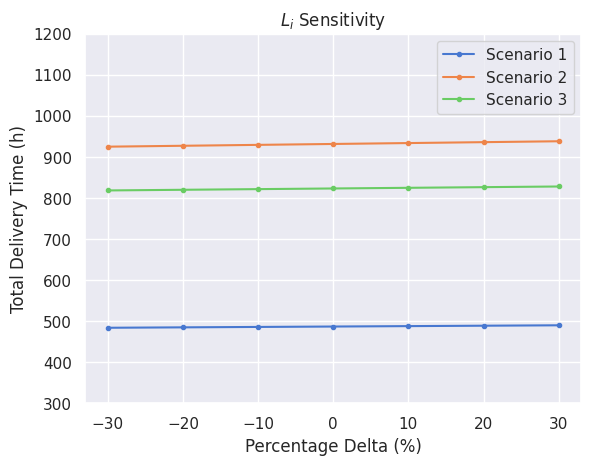

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns

# seaborn theme defaults
matplotlib_inline.backend_inline.set_matplotlib_formats('png')
sns.set_theme()
sns.set_palette("muted")

def build_sensitivity_graph(data,xlabel,ylabel,title):
    p_axis = [-30 + 10*x for x in range(7)]
    plt.plot(p_axis,data[0],marker=".",label="Scenario 1")
    plt.plot(p_axis,data[1],marker=".",label="Scenario 2")
    plt.plot(p_axis,data[2],marker=".",label="Scenario 3")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(loc='upper right')
    ax = plt.gca()
    ax.set_ylim([300, 1200])
    plt.show()
    
build_sensitivity_graph(loading_res_1,"Percentage Delta (%)","Total Delivery Time (h)",r"$L_i$ Sensitivity")

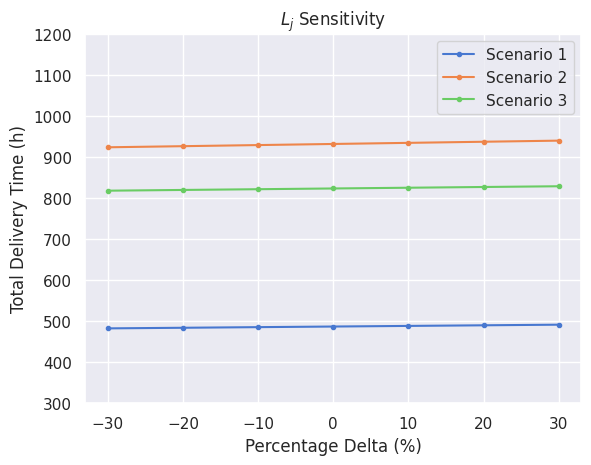

In [6]:
loading_res_2 = [[0]*7 for _ in range(3)]
for i in range(3):
    multiplier = 0.7
    for j in range(7):
        L_ = [x for x in L]
        L_[1]*=multiplier
        loading_res_2[i][j] = tdt(dist,L_,UL,s,i)
        multiplier += 0.1

build_sensitivity_graph(loading_res_2,"Percentage Delta (%)","Total Delivery Time (h)",r"$L_j$ Sensitivity")

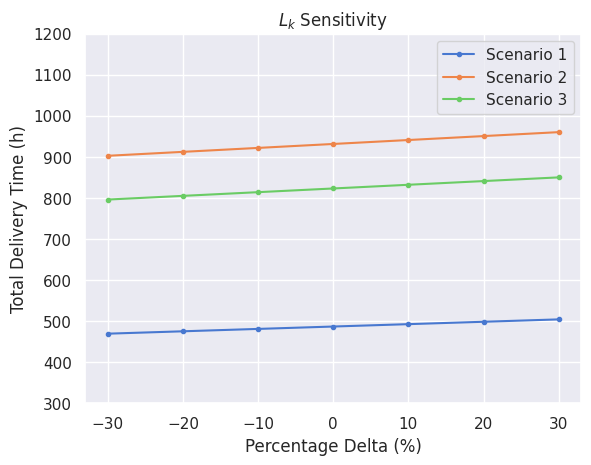

In [7]:
loading_res_3 = [[0]*7 for _ in range(3)]
for i in range(3):
    multiplier = 0.7
    for j in range(7):
        L_ = [x for x in L]
        L_[2]*=multiplier
        loading_res_3[i][j] = tdt(dist,L_,UL,s,i)
        multiplier += 0.1

build_sensitivity_graph(loading_res_3,"Percentage Delta (%)","Total Delivery Time (h)",r"$L_k$ Sensitivity")

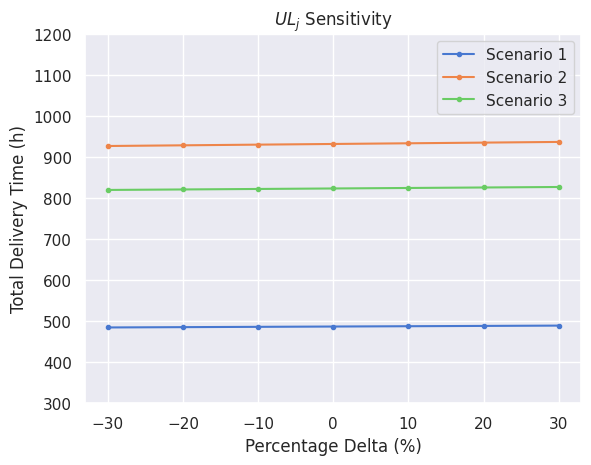

In [8]:
unloading_res_1 = [[0]*7 for _ in range(3)]
for i in range(3):
    multiplier = 0.7
    for j in range(7):
        UL_ = [x for x in UL]
        UL_[0]*=multiplier
        unloading_res_1[i][j] = tdt(dist,L,UL_,s,i)
        multiplier += 0.1

build_sensitivity_graph(unloading_res_1,"Percentage Delta (%)","Total Delivery Time (h)",r"$UL_j$ Sensitivity")

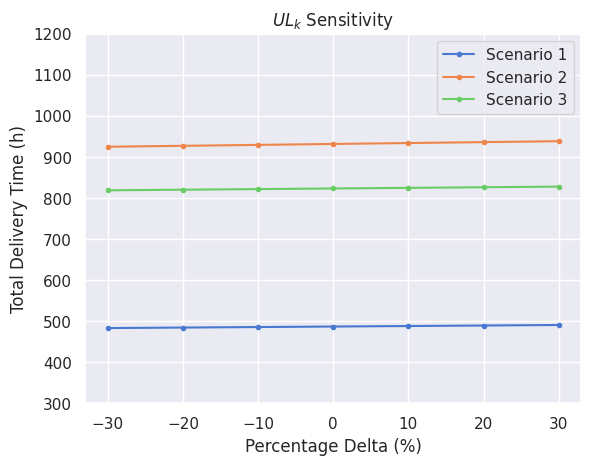

In [9]:
unloading_res_2 = [[0]*7 for _ in range(3)]
for i in range(3):
    multiplier = 0.7
    for j in range(7):
        UL_ = [x for x in UL]
        UL_[1]*=multiplier
        unloading_res_2[i][j] = tdt(dist,L,UL_,s,i)
        multiplier += 0.1

build_sensitivity_graph(unloading_res_2,"Percentage Delta (%)","Total Delivery Time (h)",r"$UL_k$ Sensitivity")

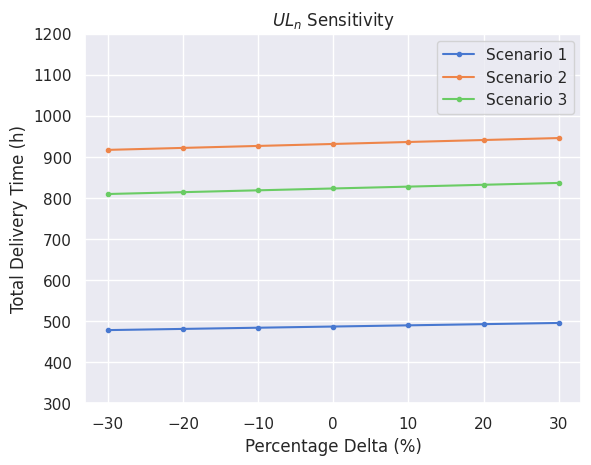

In [10]:
unloading_res_3 = [[0]*7 for _ in range(3)]
for i in range(3):
    multiplier = 0.7
    for j in range(7):
        UL_ = [x for x in UL]
        UL_[2]*=multiplier
        unloading_res_3[i][j] = tdt(dist,L,UL_,s,i)
        multiplier += 0.1

build_sensitivity_graph(unloading_res_3,"Percentage Delta (%)","Total Delivery Time (h)",r"$UL_n$ Sensitivity")

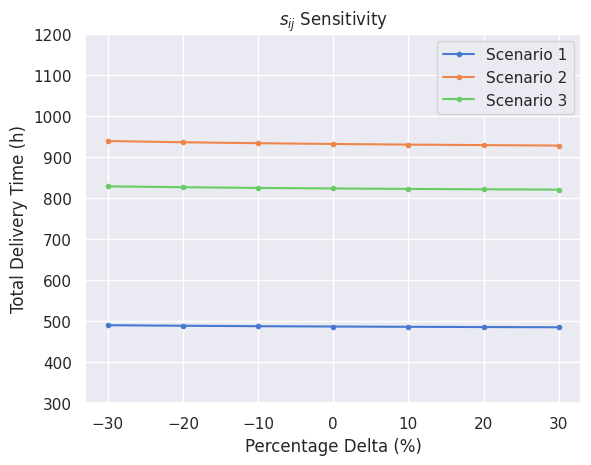

In [11]:
speed_res_1 = [[0]*7 for _ in range(3)]
for i in range(3):
    multiplier = 0.7
    for j in range(7):
        s_ = [x for x in s]
        s_[0]*=multiplier
        speed_res_1[i][j] = tdt(dist,L,UL,s_,i)
        multiplier += 0.1

build_sensitivity_graph(speed_res_1,"Percentage Delta (%)","Total Delivery Time (h)",r"$s_{ij}$ Sensitivity")

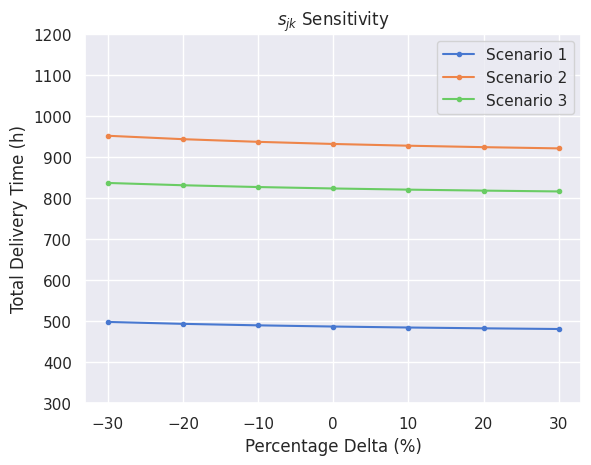

In [12]:
speed_res_2 = [[0]*7 for _ in range(3)]
for i in range(3):
    multiplier = 0.7
    for j in range(7):
        s_ = [x for x in s]
        s_[1]*=multiplier
        speed_res_2[i][j] = tdt(dist,L,UL,s_,i)
        multiplier += 0.1

build_sensitivity_graph(speed_res_2,"Percentage Delta (%)","Total Delivery Time (h)",r"$s_{jk}$ Sensitivity")

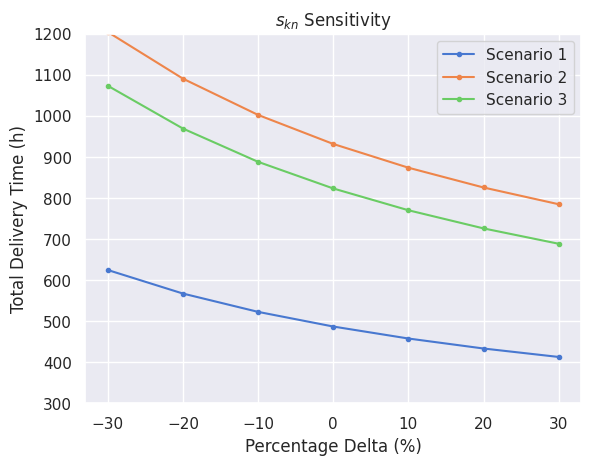

In [13]:
speed_res_3 = [[0]*7 for _ in range(3)]
for i in range(3):
    multiplier = 0.7
    for j in range(7):
        s_ = [x for x in s]
        s_[2]*=multiplier
        speed_res_3[i][j] = tdt(dist,L,UL,s_,i)
        multiplier += 0.1

build_sensitivity_graph(speed_res_3,"Percentage Delta (%)","Total Delivery Time (h)",r"$s_{kn}$ Sensitivity")

In [14]:
delta = [-30 + 10*x for x in range(7)]
lsens_1 = [0]*7
lsens_2 = [0]*7
lsens_3 = [0]*7
ulsens_1 = [0]*7
ulsens_2 = [0]*7
ulsens_3 = [0]*7
ssens_1 = [0]*7
ssens_2 = [0]*7
ssens_3 = [0]*7
col_labels = ["Delta (%)","L_i Sensitivity","L_j Sensitivity","L_k Sensitivity",
              "UL_j Sensitvity","UL_k Sensitvity","UL_n Sensitvity","s_ij Sensitivity",
             "s_jk Sensitivity","s_kn Sensitivity"]
for i in range(7):
    ldiff1,ldiff2,ldiff3 = 0,0,0
    uldiff1,uldiff2,uldiff3 = 0,0,0
    sdiff1,sdiff2,sdiff3 = 0,0,0
    for j in range(3):
        ldiff1 += (loading_res_1[j][i]-loading_res_1[j][3])
        uldiff1 += (unloading_res_1[j][i]-unloading_res_1[j][3])
        sdiff1 += (speed_res_1[j][i]-speed_res_1[j][3])
        ldiff2 += (loading_res_2[j][i]-loading_res_2[j][3])
        uldiff2 += (unloading_res_2[j][i]-unloading_res_2[j][3])
        sdiff2 += (speed_res_2[j][i]-speed_res_2[j][3])
        ldiff3 += (loading_res_3[j][i]-loading_res_3[j][3])
        uldiff3 += (unloading_res_3[j][i]-unloading_res_3[j][3])
        sdiff3 += (speed_res_3[j][i]-speed_res_3[j][3])
    ldiff1 /= 3*loading_res_1[0][3]
    uldiff1 /= 3*unloading_res_1[0][3]
    sdiff1 /= 3*speed_res_1[0][3]
    ldiff2 /= 3*loading_res_2[0][3]
    uldiff2 /= 3*unloading_res_2[0][3]
    sdiff2 /= 3*speed_res_2[0][3]
    ldiff3 /= 3*loading_res_3[0][3]
    uldiff3 /= 3*unloading_res_3[0][3]
    sdiff3 /= 3*speed_res_3[0][3]
    lsens_1[i] = ldiff1*100
    ulsens_1[i] = uldiff1*100
    ssens_1[i] = sdiff1*100
    lsens_2[i] = ldiff2*100
    ulsens_2[i] = uldiff2*100
    ssens_2[i] = sdiff2*100
    lsens_3[i] = ldiff3*100
    ulsens_3[i] = uldiff3*100
    ssens_3[i] = sdiff3*100

cols = [delta,lsens_1,lsens_2,lsens_3,ulsens_1,ulsens_2,ulsens_3,ssens_1,ssens_2,ssens_3]
delta_table = pd.DataFrame([list(x) for x in zip(*cols)],columns=col_labels)
delta_table

,Delta (%),L_i Sensitivity,L_j Sensitivity,L_k Sensitivity,UL_j Sensitvity,UL_k Sensitvity,UL_n Sensitvity,s_ij Sensitivity,s_jk Sensitivity,s_kn Sensitivity
0,-30,-0.985998,-1.232498,-5.012158,-0.739499,-1.027081,-2.506079,1.069104,3.054203,45.211736
1,-20,-0.657332,-0.821665,-3.341438,-0.492999,-0.684721,-1.670719,0.623644,1.781618,26.373513
2,-10,-0.328666,-0.410833,-1.670719,-0.246500,-0.342360,-0.835360,0.277175,0.791830,11.721561
3,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,10,0.328666,0.410833,1.670719,0.246500,0.342360,0.835360,-0.226780,-0.647861,-9.590368
5,20,0.657332,0.821665,3.341438,0.492999,0.684721,1.670719,-0.415763,-1.187746,-17.582342
6,30,0.985998,1.232498,5.012158,0.739499,1.027081,2.506079,-0.575671,-1.644571,-24.344781


In [15]:
status = [1,1,1,2,1,0,2,0,1,0,1,1,1,1,1,1,2,2,0,0,2,1,2,0,2,2,1,2,1,1,1,2,0,1,1]

def tdt_zonewise(data,q):
    airport_time = [15.843,15.7653125,15.483]
    T = dist[2].to_numpy()/s[2]
    T += (L[2]+UL[2])
    t_d = [0]*len(data[0])
    cnt = 0
    gz_avg,oz_avg,rz_avg = 0,0,0
    gz_cnt,oz_cnt,rz_cnt = 0,0,0
    for i in range(len(T[0])):
        for j in range(len(T)):
            t_d[i] += (T[j][i]+airport_time[j])*data[j][i]
        cnt = q[:,i].sum();
        if status[i] == 0:
            gz_avg += t_d[i]
            gz_cnt += cnt
        elif status[i] == 1:
            oz_avg += t_d[i]
            oz_cnt += cnt
        else:
            rz_avg += t_d[i]
            rz_cnt += cnt
    gz_avg /= gz_cnt
    oz_avg /= oz_cnt
    rz_avg /= rz_cnt
    return gz_avg,oz_avg,rz_avg

tdt_zonewise(data[0][1][2][:,:,0],data[0][0][2][:,:,0])

(14.991068452380953, 5.8979978932584265, 1.3717952366979658)

In [16]:
tdt_zonewise(data[1][1][2][:,:,0],data[1][0][2][:,:,0])

(2.831355780516432, 2.9070952212806027, 0.9963031868451688)

In [17]:
tdt_zonewise(data[2][1][2][:,:,0],data[2][0][2][:,:,0])

(5.822686507936508, 5.3020520257826895, 1.127704865967366)